In [34]:
import pandas as pd

# Load the dataset
df = pd.read_csv('cleaned.csv')

# Display basic information
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age_band_of_driver       12316 non-null  object
 1   Sex_of_driver            12316 non-null  object
 2   Educational_level        12316 non-null  object
 3   Vehicle_driver_relation  12316 non-null  object
 4   Driving_experience       12316 non-null  object
 5   Lanes_or_Medians         12316 non-null  object
 6   Types_of_Junction        12316 non-null  object
 7   Road_surface_type        12316 non-null  object
 8   Light_conditions         12316 non-null  object
 9   Weather_conditions       12316 non-null  object
 10  Type_of_collision        12316 non-null  object
 11  Vehicle_movement         12316 non-null  object
 12  Pedestrian_movement      12316 non-null  object
 13  Cause_of_accident        12316 non-null  object
 14  Accident_severity        12316 non-nul

In [35]:
# Basic statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Handle missing values if necessary
df = df.dropna()  # or use df.fillna() based on the situation


       Accident_severity
count       12316.000000
mean            1.832819
std             0.406082
min             0.000000
25%             2.000000
50%             2.000000
75%             2.000000
max             2.000000
Age_band_of_driver         0
Sex_of_driver              0
Educational_level          0
Vehicle_driver_relation    0
Driving_experience         0
Lanes_or_Medians           0
Types_of_Junction          0
Road_surface_type          0
Light_conditions           0
Weather_conditions         0
Type_of_collision          0
Vehicle_movement           0
Pedestrian_movement        0
Cause_of_accident          0
Accident_severity          0
dtype: int64


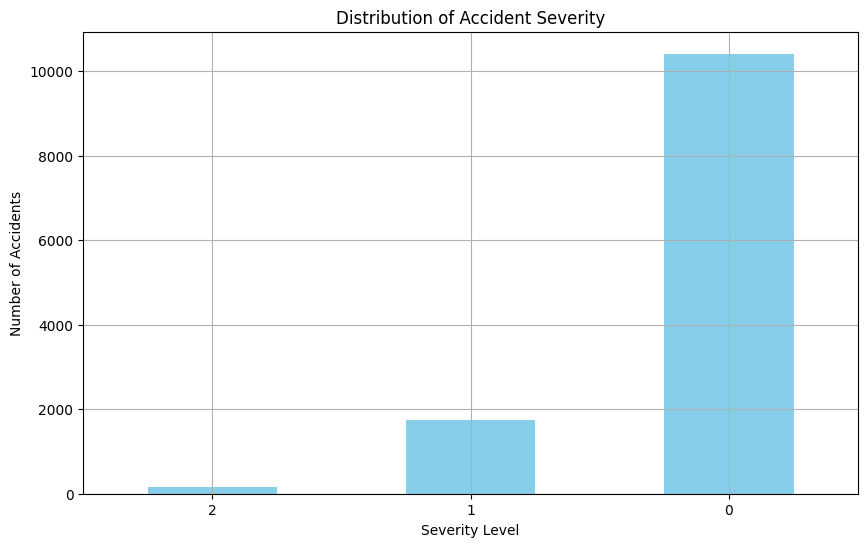

In [36]:
import matplotlib.pyplot as plt

# Plot distribution of accident severity
plt.figure(figsize=(10, 6))
df['Accident_severity'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Accident Severity')
plt.xlabel('Severity Level')
plt.ylabel('Number of Accidents')
plt.xticks(ticks=range(len(df['Accident_severity'].unique())), labels=df['Accident_severity'].unique(), rotation=0)
plt.grid(True)
plt.show()


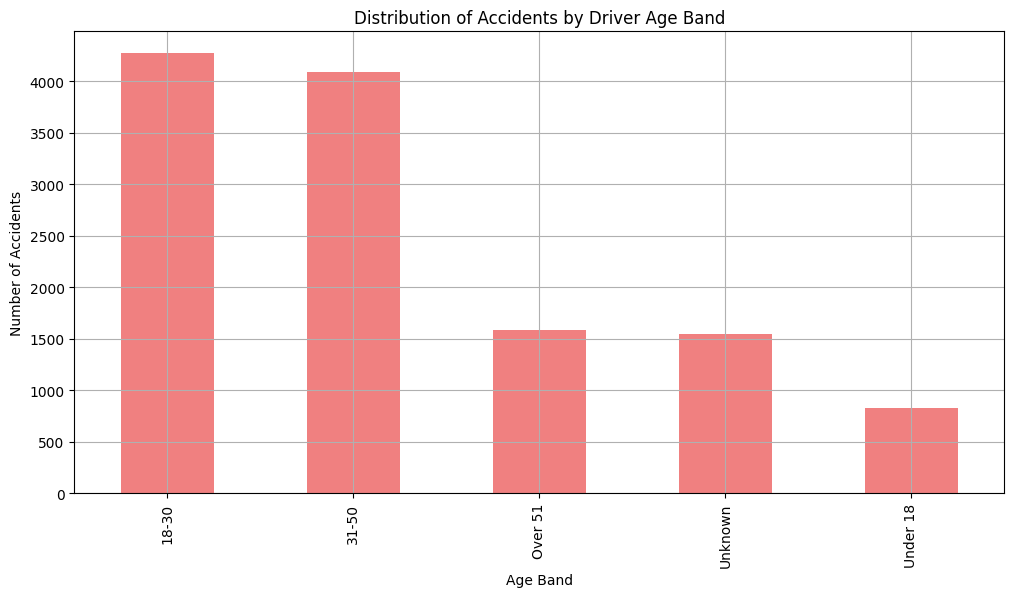

In [37]:
plt.figure(figsize=(12, 6))
df['Age_band_of_driver'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Distribution of Accidents by Driver Age Band')
plt.xlabel('Age Band')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()


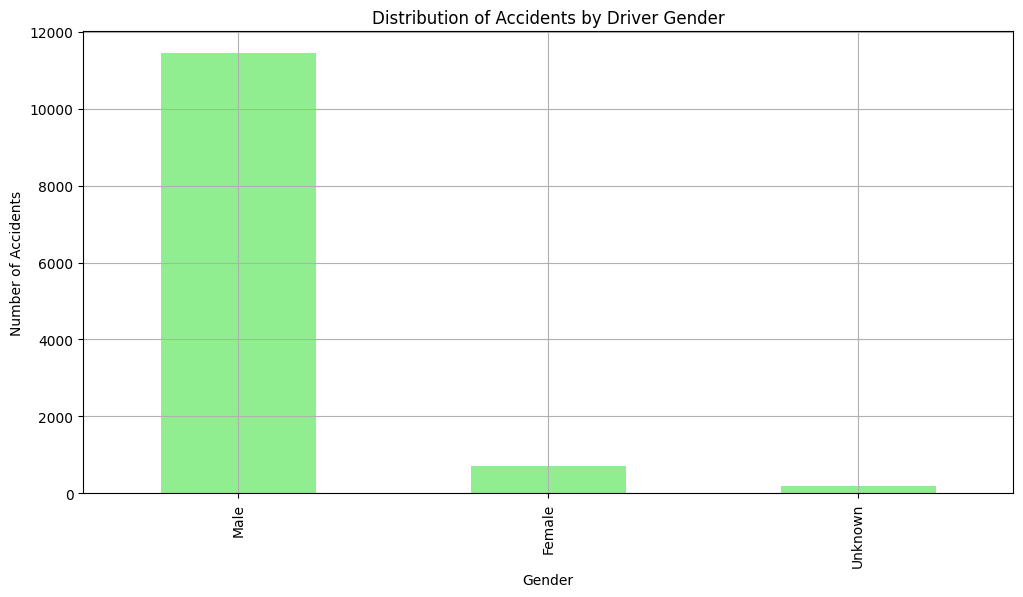

In [38]:
plt.figure(figsize=(12, 6))
df['Sex_of_driver'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Distribution of Accidents by Driver Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()


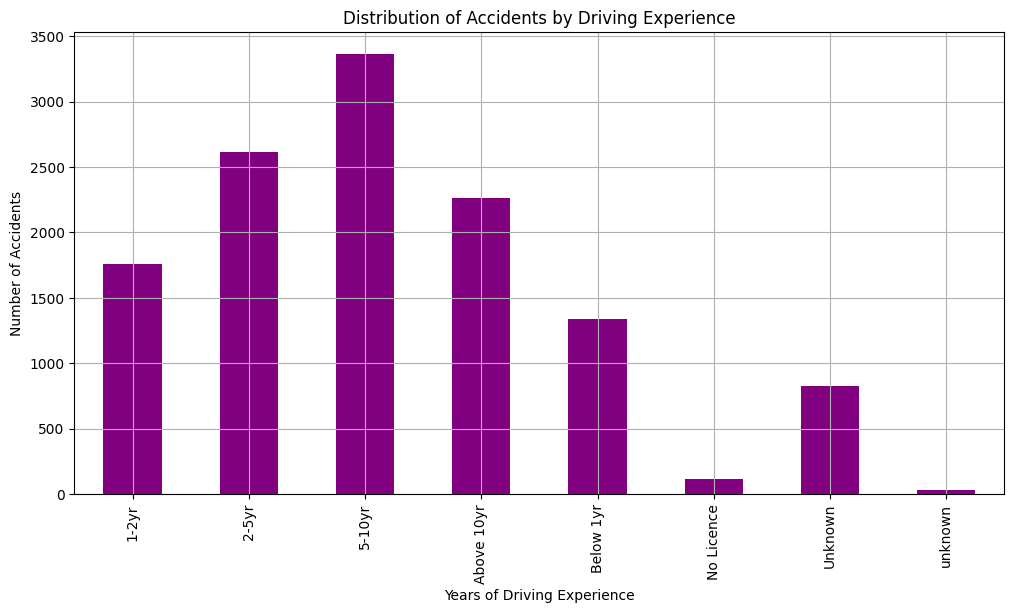

In [39]:
plt.figure(figsize=(12, 6))
df['Driving_experience'].value_counts().sort_index().plot(kind='bar', color='purple')
plt.title('Distribution of Accidents by Driving Experience')
plt.xlabel('Years of Driving Experience')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()


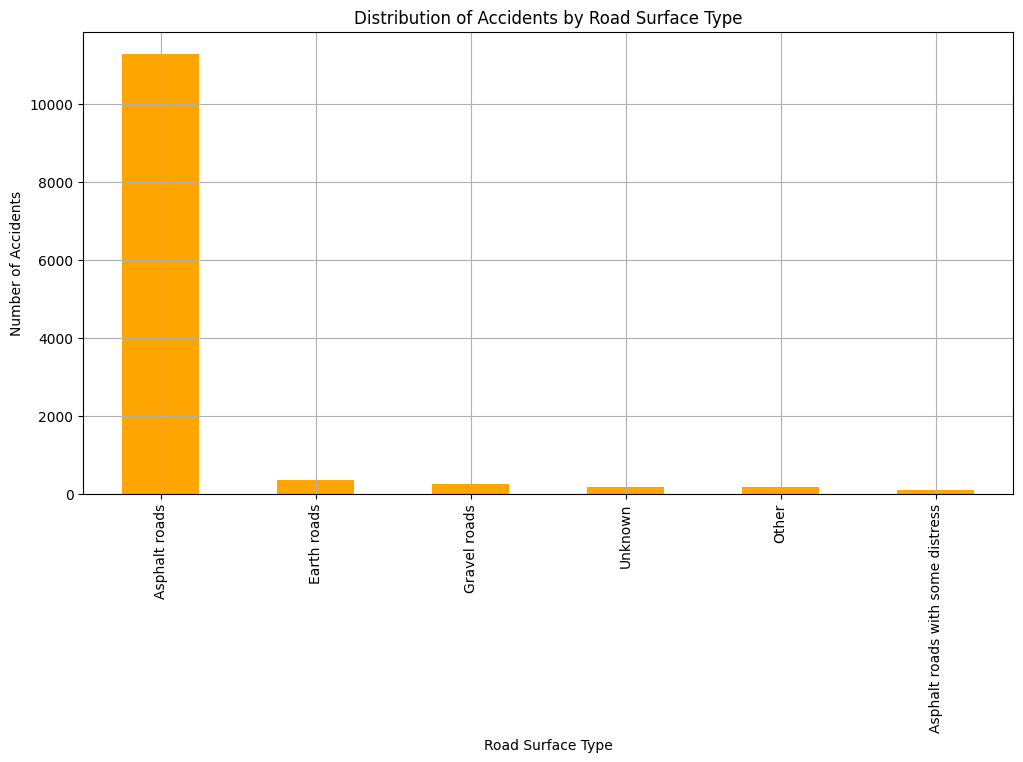

In [40]:
plt.figure(figsize=(12, 6))
df['Road_surface_type'].value_counts().plot(kind='bar', color='orange')
plt.title('Distribution of Accidents by Road Surface Type')
plt.xlabel('Road Surface Type')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()


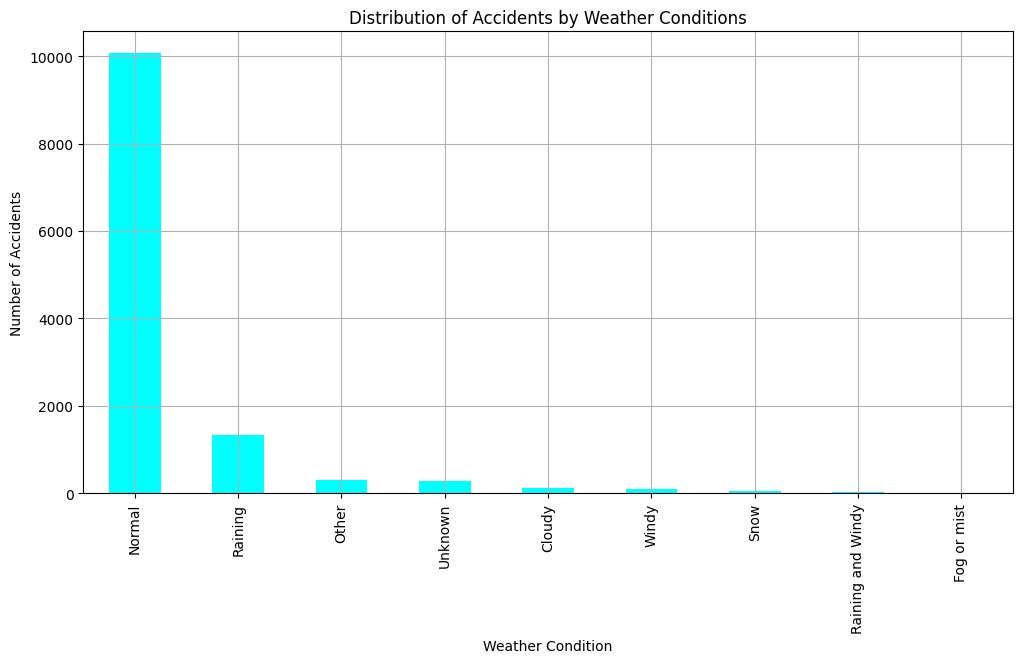

In [41]:
plt.figure(figsize=(12, 6))
df['Weather_conditions'].value_counts().plot(kind='bar', color='cyan')
plt.title('Distribution of Accidents by Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()


           Latitude     Longitude
count  12316.000000  12316.000000
mean      35.990748   -117.503746
std        0.578691      0.583544
min       35.000145   -118.499667
25%       35.490028   -118.011271
50%       35.981351   -117.498381
75%       36.494093   -116.993032
max       36.999956   -116.500076


<ipython-input-46-a5958a26c20b>:16: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<Figure size 1200x1200 with 0 Axes>

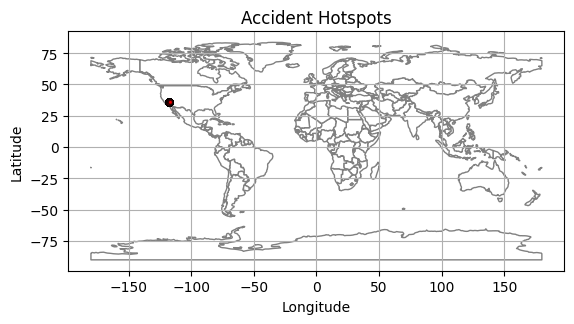

In [46]:
# Ensure your dataset has latitude and longitude columns
# Generate synthetic latitude and longitude data if necessary
# Comment out the next 4 lines if your dataset already includes latitude and longitude
np.random.seed(0)  # For reproducibility
df['Latitude'] = np.random.uniform(low=35.0, high=37.0, size=len(df))  # Example range
df['Longitude'] = np.random.uniform(low=-118.5, high=-116.5, size=len(df))  # Example range

# Check data ranges
print(df[['Latitude', 'Longitude']].describe())

# Create GeoDataFrame
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Load a basemap (natural earth data is used here)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot hotspots
plt.figure(figsize=(12, 12))

# Plot the base map
ax = world.plot(color='white', edgecolor='grey')

# Plot accident data on top of the base map
gdf.plot(ax=ax, markersize=10, color='red', alpha=0.6, edgecolor='black')

plt.title('Accident Hotspots')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()